In [110]:
#Import necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")  # Not always recommended, but jsut so our notebook looks clean for this activity

In [222]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor

from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [112]:
Data1 = pd.read_csv('Concrete_project.csv')

In [114]:
Data1.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [115]:
Data1.shape


(1030, 9)

In [116]:
Data1.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [117]:
Data1.isnull().sum()


cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [118]:
Data1.isnull().mean()

cement          0.0
slag            0.0
ash             0.0
water           0.0
superplastic    0.0
coarseagg       0.0
fineagg         0.0
age             0.0
strength        0.0
dtype: float64

In [119]:
Data1.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


1) The Data needs to be scaled as the Quantity in all features are different and extremes. 

2) There are some outliers in some of the features which will do in next section. 

3) Cement, Slag Superplastic, Age are the main features which will have some probable outliers. 

4) there are no missing values  and Data looks cleans not much Junk in it. 

# Univariate Analysis of each feature

{'whiskers': [<matplotlib.lines.Line2D at 0x1e666d47408>,
 'caps': [<matplotlib.lines.Line2D at 0x1e666d20dc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e666cdd708>],
 'medians': [<matplotlib.lines.Line2D at 0x1e665cb4bc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e665cb4a88>],
 'means': []}

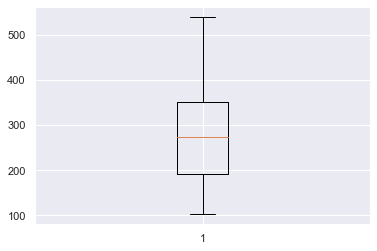

In [120]:
#1 Cement

# Check the Cement and see if there are any outliers 
# looks like we are good with the Cement feature
#sns.boxplot(x='cement', data=Data1)

plt.boxplot(Data1['cement'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1e667b97808>,
 'caps': [<matplotlib.lines.Line2D at 0x1e667792d88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e667792388>],
 'medians': [<matplotlib.lines.Line2D at 0x1e666e78d48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e666e78dc8>],
 'means': []}

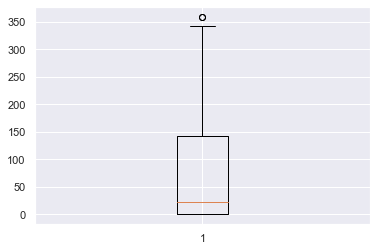

In [121]:
#2 Slag
plt.boxplot(Data1['slag'])


In [122]:
#check the IQR method and see the outliers putting a maximum upper limit of 3 and see
IQR = Data1.slag.quantile(0.75) - Data1.slag.quantile(0.25)

Lower_fence = Data1.slag.quantile(0.25) - (IQR * 1.5)
Upper_fence = Data1.slag.quantile(0.75) + (IQR * 1.5)

Upper_fence, Lower_fence, IQR

(357.375, -214.42499999999998, 142.95)

In [123]:
#  try to check if we can ignore the 275 looking the below value

print('slag with  more than 357: {}'.format(
    Data1[Data1.slag > 357].shape[0] ))
print('slag with  Equals than 0: {}'.format(
    Data1[Data1.slag == 0].shape[0] ))


slag with  more than 357: 2
slag with  Equals than 0: 471


In [124]:
# remove the extreme outliers of slag but not removing the ones with zero value as we will seee it later 

Data2 = Data1[Data1['slag'] < 357]

{'whiskers': [<matplotlib.lines.Line2D at 0x1e666cc12c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1e666cf8ec8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e666cdbf48>],
 'medians': [<matplotlib.lines.Line2D at 0x1e667996e48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e667996f48>],
 'means': []}

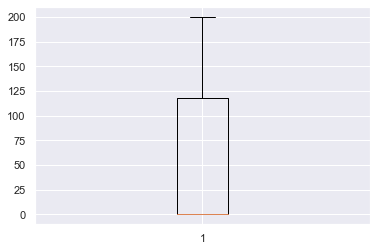

In [125]:
#3 Ash

plt.boxplot(Data2['ash'])


In [126]:
#check the IQR method and see the outliers putting a maximum upper limit of 3 and see
IQR = Data2.ash.quantile(0.75) - Data2.ash.quantile(0.25)

Lower_fence = Data1.ash.quantile(0.25) - (IQR * 1.5)
Upper_fence = Data1.ash.quantile(0.75) + (IQR * 1.5)

Upper_fence, Lower_fence, IQR

(295.75, -177.45, 118.3)

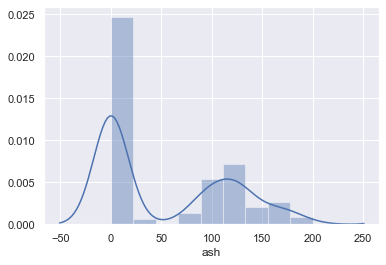

In [127]:
sns.set(color_codes=True)
sns.distplot(Data2['ash'])

In [44]:
# there is no much of outliers. 

# the lower level Data is very high around 0 and we will deal with it later 

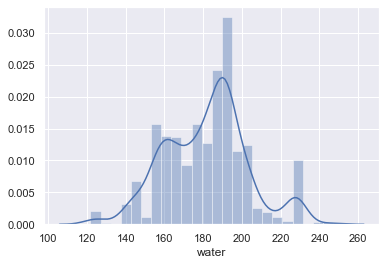

In [128]:
#4 water 
#looking at the describe function there is no much outliers

sns.set(color_codes=True)
sns.distplot(Data2['water'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1e6673d6e08>,
 'caps': [<matplotlib.lines.Line2D at 0x1e6673e9f88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e6673e4d48>],
 'medians': [<matplotlib.lines.Line2D at 0x1e6673eff08>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e6673f4f48>],
 'means': []}

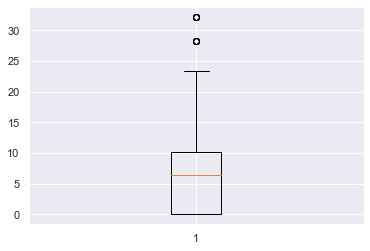

In [129]:
#5 superplastic
# 25 % of the data will be zero but as the data is very high we are not removing the Data. 


plt.boxplot(Data2['superplastic'])



In [130]:
#check the IQR method and see the outliers putting a maximum upper limit of 3 and see
IQR = Data2.superplastic.quantile(0.75) - Data2.superplastic.quantile(0.25)

Lower_fence = Data2.superplastic.quantile(0.25) - (IQR * 1.5)
Upper_fence = Data2.superplastic.quantile(0.75) + (IQR * 1.5)

Upper_fence, Lower_fence, IQR

(25.5, -15.299999999999999, 10.2)

In [131]:
#  try to check if we can ignore the 275 looking the below value

print('superplastic with  more than 25: {}'.format(
    Data2[Data2.superplastic > 26].shape[0] ))
print('superplastics with  less than 0: {}'.format(
    Data2[Data2.superplastic < 0].shape[0] ))


superplastic with  more than 25: 10
superplastics with  less than 0: 0


In [132]:
# remove the extreme outliers of superplastic

Data3 = Data2[Data2['superplastic'] < 25]

In [133]:
Data3.shape

(1018, 9)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e66743aec8>,
 'caps': [<matplotlib.lines.Line2D at 0x1e667455f88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e667450c48>],
 'medians': [<matplotlib.lines.Line2D at 0x1e667458f08>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e66745dd88>],
 'means': []}

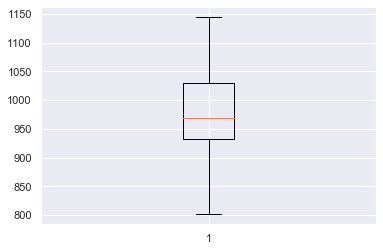

In [134]:
#6 coarseagg

plt.boxplot(Data3['coarseagg'])

In [25]:
#no Outliers in the Coarseagg , so we go to next feature

{'whiskers': [<matplotlib.lines.Line2D at 0x1e6674ab348>,
 'caps': [<matplotlib.lines.Line2D at 0x1e6674c1d48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e6674bc288>],
 'medians': [<matplotlib.lines.Line2D at 0x1e6674c6cc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e6674c6dc8>],
 'means': []}

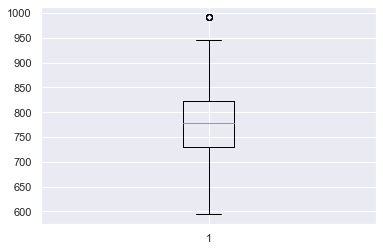

In [135]:
#7 fineseagg

plt.boxplot(Data3['fineagg'])

In [136]:
#check the IQR method and see the outliers putting a maximum upper limit of 3 and see
IQR = Data3.fineagg.quantile(0.75) - Data3.fineagg.quantile(0.25)

Lower_fence = Data3.fineagg.quantile(0.25) - (IQR * 1.5)
Upper_fence = Data3.fineagg.quantile(0.75) + (IQR * 1.5)

Upper_fence, Lower_fence, IQR

(959.8499999999999, 592.25, 91.89999999999998)

In [138]:
#  try to check if we can ignore the 275 looking the below value

print('fineagg with  more than 960: {}'.format(
    Data3[Data3.fineagg > 960].shape[0] ))
print('fineagg with  less than 0: {}'.format(
    Data3[Data3.fineagg  < 0].shape[0] ))


fineagg with  more than 960: 5
fineagg with  less than 0: 0


In [139]:
# remove the extreme outliers of superplastic

Data4 = Data3[Data3['fineagg'] < 960]

In [140]:
Data4.shape

(1013, 9)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e667519d08>,
 'caps': [<matplotlib.lines.Line2D at 0x1e667534d08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e6675319c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1e667538c88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e66753cb08>],
 'means': []}

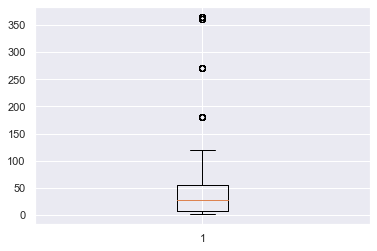

In [141]:
#8 age



plt.boxplot(Data4['age'])

In [142]:
#check the IQR method and see the outliers putting a maximum upper limit of 3 and see
IQR = Data4.age.quantile(0.75) - Data4.age.quantile(0.25)

Lower_fence = Data4.age.quantile(0.25) - (IQR * 1.5)
Upper_fence = Data4.age.quantile(0.75) + (IQR * 1.5)

Upper_fence, Lower_fence, IQR

(129.5, -66.5, 49.0)

In [143]:
#  try to check if we can ignore the 275 looking the below value

print('age with  more than 960: {}'.format(
    Data4[Data4.age > 129].shape[0] ))
print('age with  less than 0: {}'.format(
    Data4[Data4.age  < 0].shape[0] ))

age with  more than 960: 59
age with  less than 0: 0


In [144]:
# since the number is very high , We can try the high IQR range

#check the IQR method and see the outliers putting a maximum upper limit of 3 and see
IQR = Data4.age.quantile(0.75) - Data4.age.quantile(0.25)

Lower_fence = Data4.age.quantile(0.25) - (IQR * 3)
Upper_fence = Data4.age.quantile(0.75) + (IQR * 3)

Upper_fence, Lower_fence, IQR

(203.0, -140.0, 49.0)

In [145]:
#  try to check if we can ignore the 275 looking the below value

print('age with  more than 203: {}'.format(
    Data4[Data4.age > 203].shape[0] ))
print('age with  less than 0: {}'.format(
    Data4[Data4.age  < 0].shape[0] ))

age with  more than 203: 33
age with  less than 0: 0


In [38]:
# since there outlier numbers are very high we can leave those data there for the age. 

# Bivariate Analysis

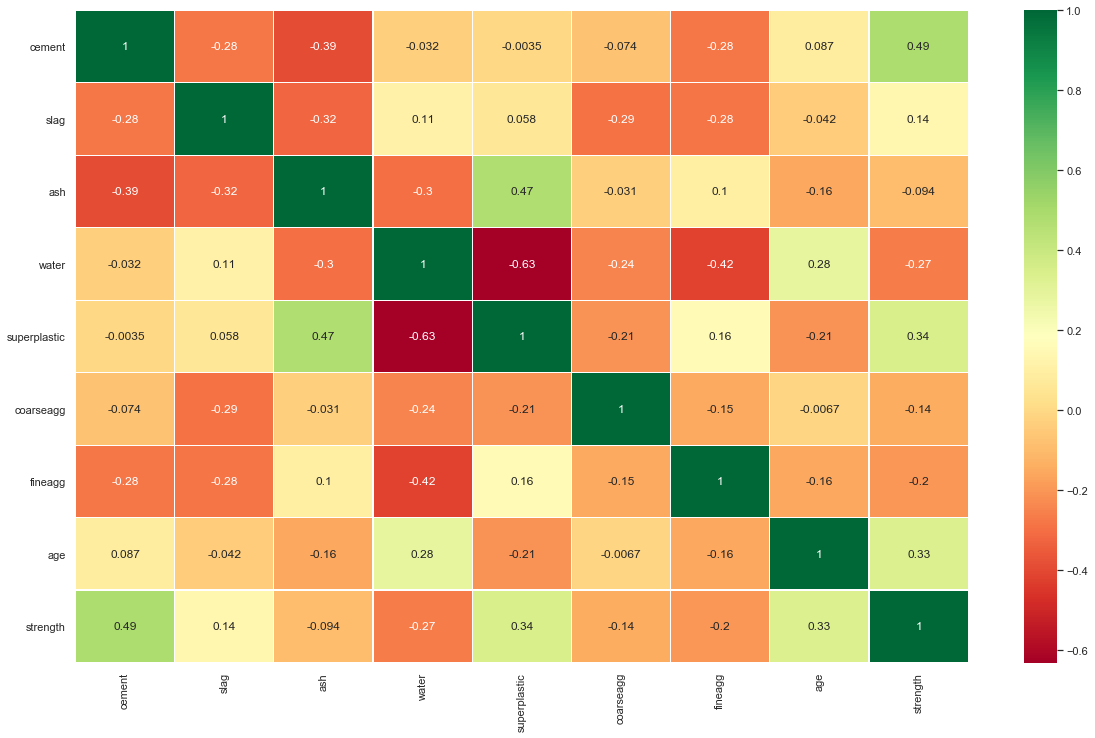

In [146]:
#check the correlation between each variable 

sns.heatmap(Data4.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

1) Not much correlation except the Superplastic and Water

2) All other correlation looks fine. The correlation is very less with each feature , so it is good candidate for the linear regresssion .

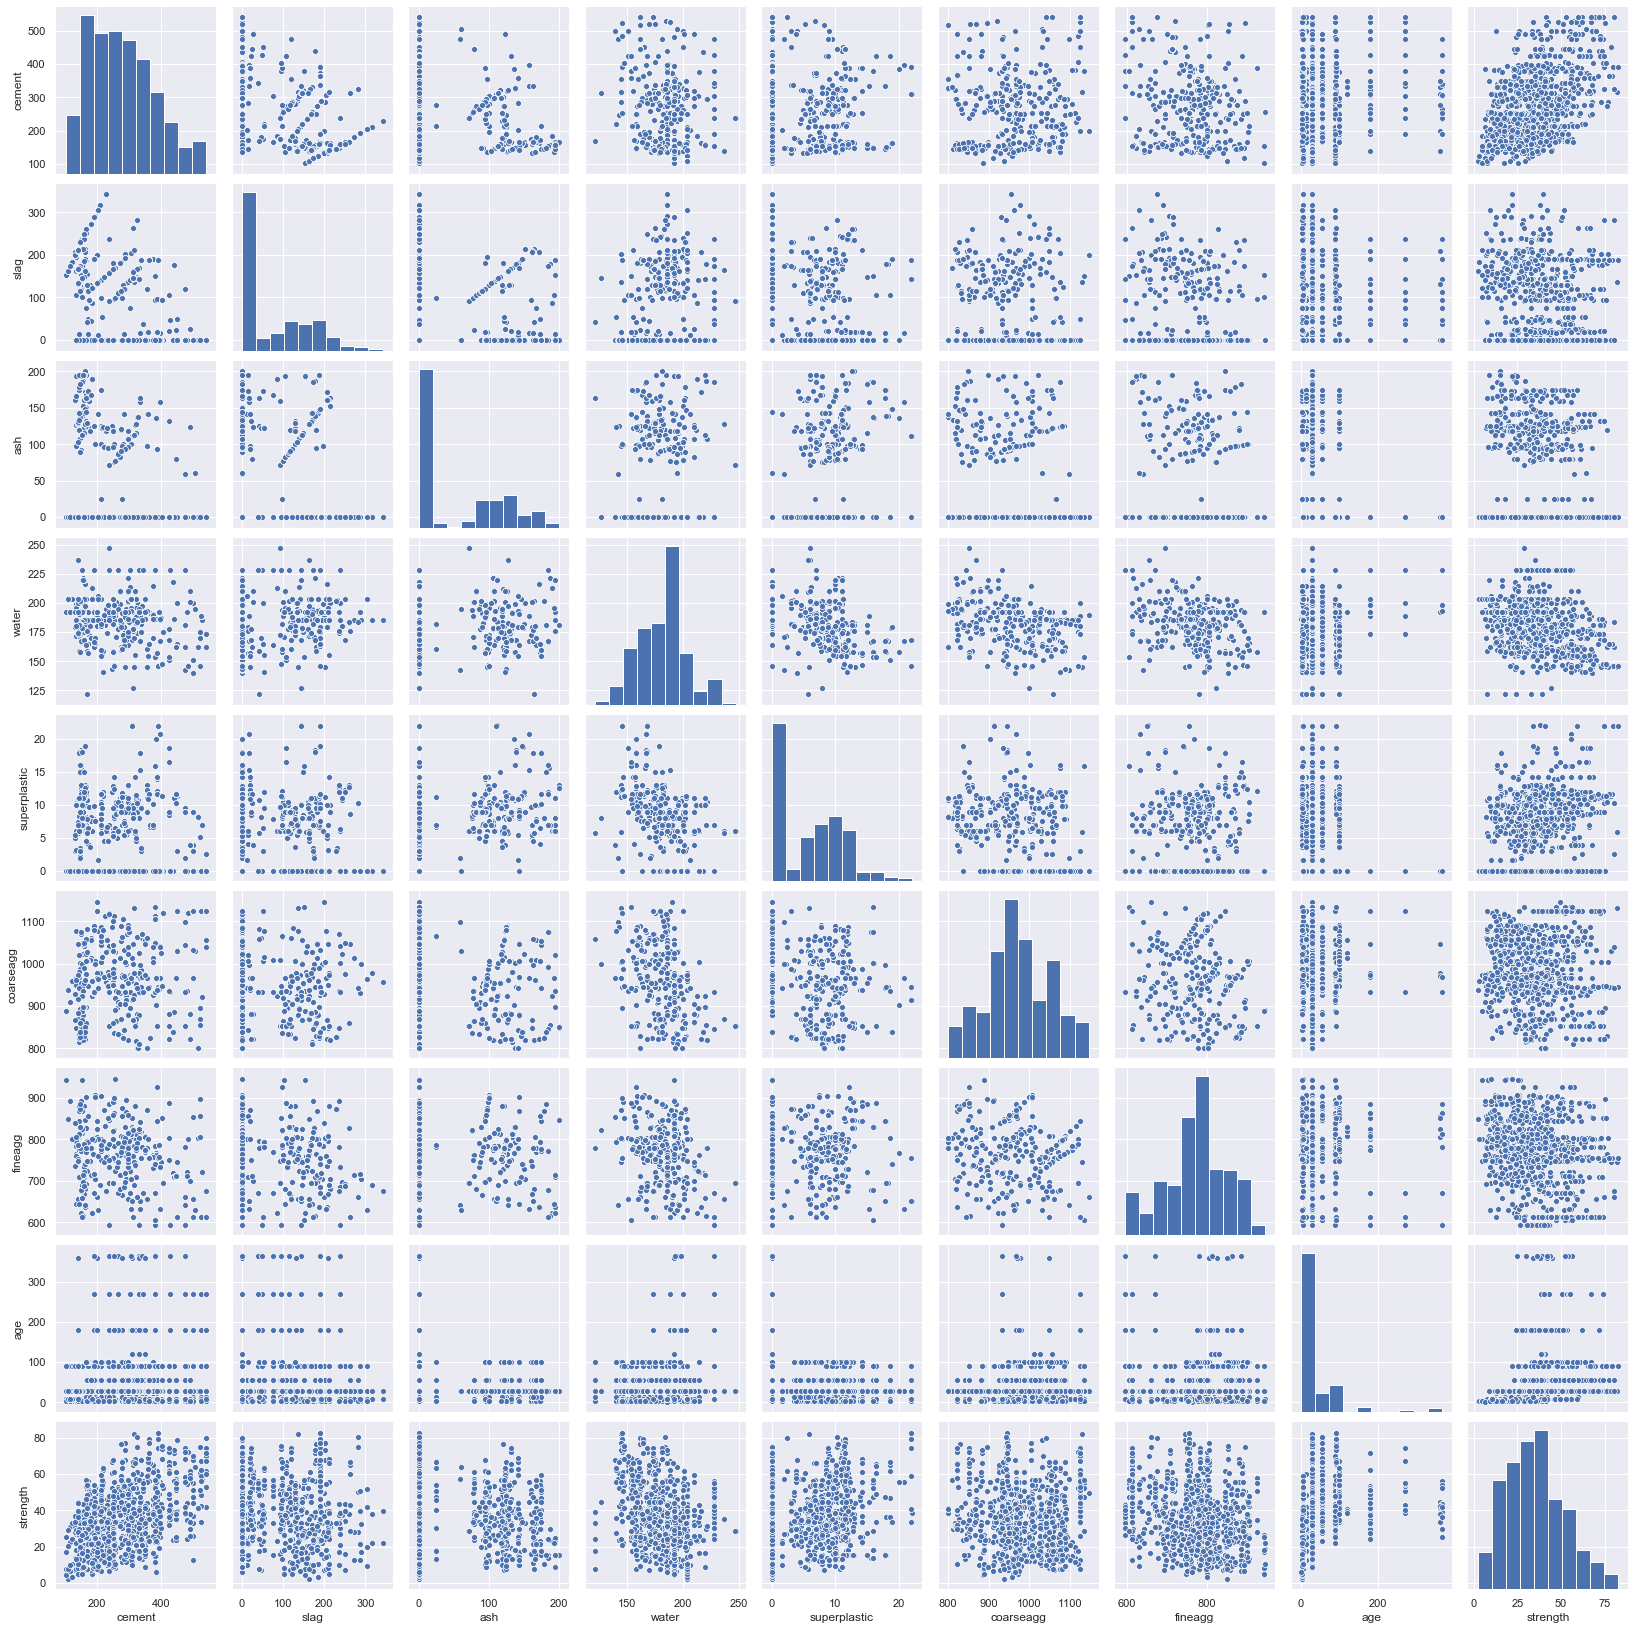

In [147]:
sns.pairplot(Data4)

1) The pair plot is not showing any strong relation between the variables.. 

2) Cement and Strength got a very strong linear relation

3) the zero is very high in the Slag, Ash , Superplastic and age which should be deal with 

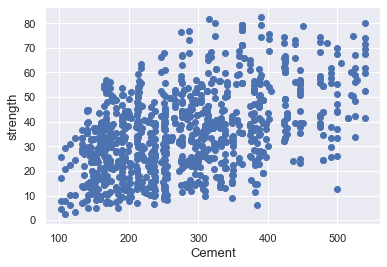

In [148]:
# relation between cement and strength
# Strong relation between these 2 features. 

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(Data4['cement'], Data4['strength'])
plt.ylabel('strength', fontsize=13)
plt.xlabel('Cement', fontsize=13)
plt.show()


 mu = 35.55 and sigma = 16.62



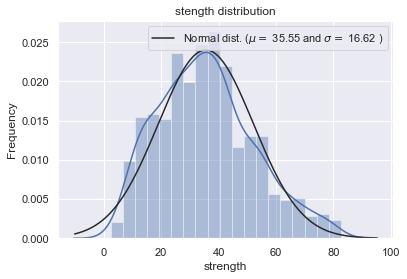

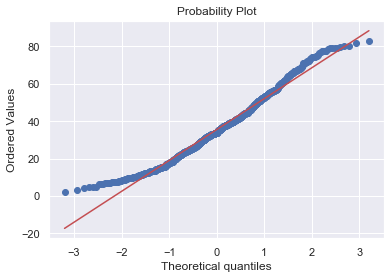

In [149]:
# check the distribution of strenght

from scipy import stats
from scipy.stats import norm, skew #for some statistics

sns.distplot(Data4['strength'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(Data4['strength'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('stength distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(Data4['strength'], plot=plt)
plt.show()

In [53]:
#  there is left Skewed.
#The target variable is left skewed. As (linear) models love normally distributed data , Still data looks fine 


 mu = 73.38 and sigma = 85.80



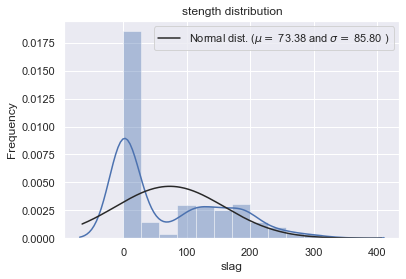

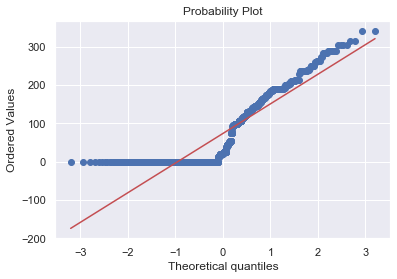

In [150]:
# Slag  >> Check the Skewness

sns.distplot(Data4['slag'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(Data4['slag'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('stength distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(Data4['slag'], plot=plt)
plt.show()


 mu = 2.54 and sigma = 2.41



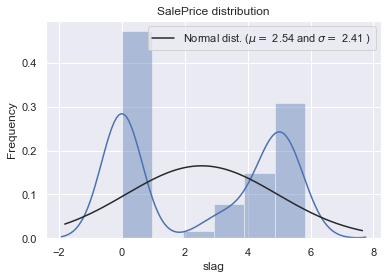

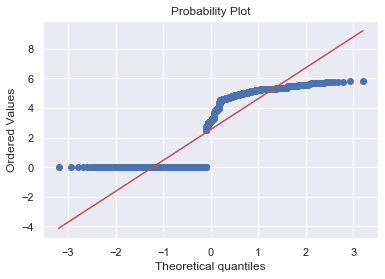

In [151]:
# log transformation  to remove the skewness

Data4['slag'] = np.log1p(Data4['slag'])

#Check the new distribution 
sns.distplot(Data4['slag'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(Data4['slag'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(Data4['slag'], plot=plt)
plt.show()

In [65]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if count>0 it gets 1, for count==0 it gets 0
#Data4['slagnew'] = pd.Series(len(Data4['slag']), index=Data4.index)
#Data4['slagnew'] = 0 
#
#Data4.loc[Data4['slag']>0,'slagnew'] = 1

In [66]:
#transform data
#Data4.loc[Data4['slagnew']==1,'slag'] = np.log(Data4['slag'])

In [72]:
#histogram and normal probability plot
#sns.distplot(Data4[Data4['slag']>0]['slag'], fit=norm);
#fig = plt.figure()
#res = stats.probplot(Data4[Data4['slag']>0]['slag'], plot=plt)

#still the data was not getting normally distributed.. So we will keep the value as it is 

In [42]:
Data4

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,5.361292,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,3.765840,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.000000,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,4.744932,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,5.217107,0.0,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1024,297.2,0.000000,117.5,174.8,9.5,1022.8,753.5,3,21.91
1025,135.0,0.000000,166.0,180.0,10.0,961.0,805.0,28,13.29
1027,276.4,4.762174,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,3.663562,0.0,228.0,0.0,932.0,670.0,270,55.06


1) The Slag/Ash/superplastic/fineagg features have  more values with value "Zero"

2)  Do the log transformation for the values using log1p function 

3) this will correct the gaussian distribution for these features.. 

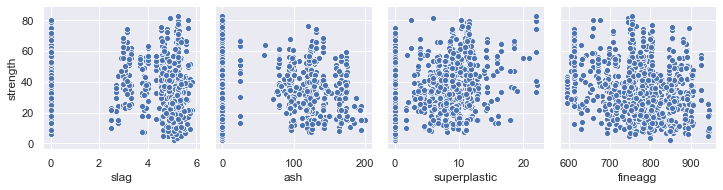

In [153]:
sns.pairplot(Data4, y_vars='strength', x_vars=["slag", "ash",
                                                       'superplastic', 'fineagg'])
                                                        
plt.show()

In [44]:
# Log Transformation of independent variables

slaglog = np.log1p(Data4['slag'])
ashlog = np.log1p(Data4['ash'])
superlog = np.log1p(Data4['superplastic'])
fineagglog = np.log1p(Data4['fineagg'])

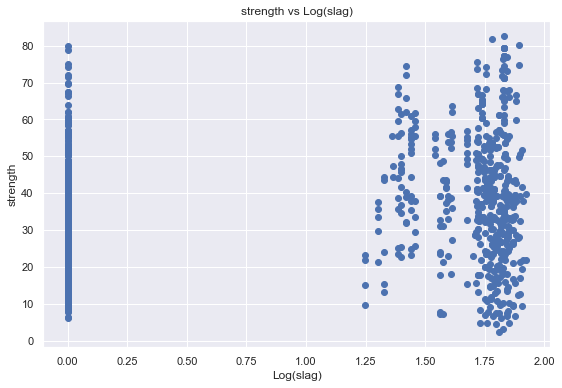

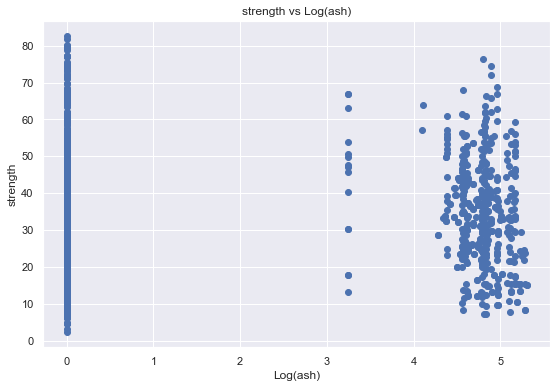

In [154]:
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
plt.title('strength vs Log(slag)')
plt.scatter( slaglog, Data4['strength'])
plt.xlabel('Log(slag)')
plt.ylabel('strength')


plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
plt.title('strength vs Log(ash)')
plt.scatter( ashlog, Data4['strength'])
plt.xlabel('Log(ash)')
plt.ylabel('strength')

plt.show()

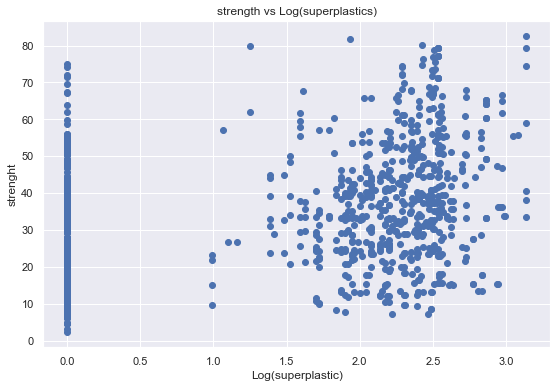

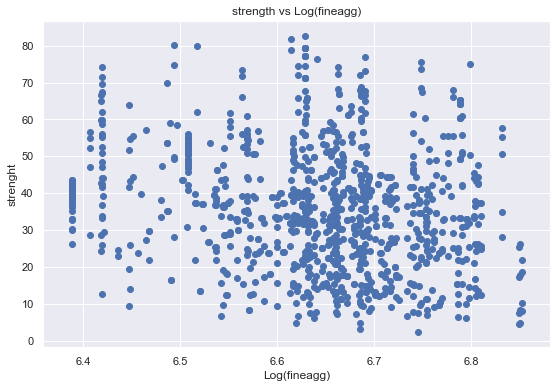

In [155]:
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
plt.title('strength vs Log(superplastics)')
plt.scatter( superlog, Data4['strength'])
plt.xlabel('Log(superplastic)')
plt.ylabel('strenght')


plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
plt.title('strength vs Log(fineagg)')
plt.scatter( fineagglog, Data4['strength'])
plt.xlabel('Log(fineagg)')
plt.ylabel('strenght')

plt.show()

In [62]:
# looks better when the log transaformation is done.

In [156]:
Data4.head().T

,0,1,2,3,4
cement,141.300000,168.90000,250.00,266.000000,154.800000
slag,5.361292,3.76584,0.00,4.744932,5.217107
ash,0.000000,124.30000,95.70,0.000000,0.000000
water,203.500000,158.30000,187.40,228.000000,193.300000
superplastic,0.000000,10.80000,5.50,0.000000,9.100000
coarseagg,971.800000,1080.80000,956.90,932.000000,1047.400000
fineagg,748.500000,796.20000,861.20,670.000000,696.700000
age,28.000000,14.00000,28.00,28.000000,28.000000
strength,29.890000,23.51000,29.22,45.850000,18.290000


In [157]:
Data4.columns


Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [158]:
Data4['fineagglog'] = fineagglog
Data4['ashlog'] = ashlog
Data4['slaglog'] = slaglog
Data4['superplasticlog'] = superlog

In [50]:
Data4

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,fineagglog,ashlog,slaglog,superplasticlog
0,141.3,5.361292,0.0,203.5,0.0,971.8,748.5,28,29.89,6.619406,0.000000,1.850232,0.000000
1,168.9,3.765840,124.3,158.3,10.8,1080.8,796.2,14,23.51,6.681106,4.830711,1.561474,2.468100
2,250.0,0.000000,95.7,187.4,5.5,956.9,861.2,28,29.22,6.759487,4.571613,0.000000,1.871802
3,266.0,4.744932,0.0,228.0,0.0,932.0,670.0,28,45.85,6.508769,0.000000,1.748318,0.000000
4,154.8,5.217107,0.0,193.3,9.1,1047.4,696.7,28,18.29,6.547789,0.000000,1.827305,2.312535
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,297.2,0.000000,117.5,174.8,9.5,1022.8,753.5,3,21.91,6.626055,4.774913,0.000000,2.351375
1025,135.0,0.000000,166.0,180.0,10.0,961.0,805.0,28,13.29,6.692084,5.117994,0.000000,2.397895
1027,276.4,4.762174,90.3,179.6,8.9,870.1,768.3,28,44.28,6.645481,4.514151,1.751315,2.292535
1028,342.0,3.663562,0.0,228.0,0.0,932.0,670.0,270,55.06,6.508769,0.000000,1.539779,0.000000


In [159]:
# Drop the original Data and use the only the log transformed Data
          
Data4 = Data4.drop(['slag', 'ash' , 'fineagg' , 'superplastic'] , axis = 1)           

In [160]:
Data4.head().T

,0,1,2,3,4
cement,141.300000,168.900000,250.000000,266.000000,154.800000
water,203.500000,158.300000,187.400000,228.000000,193.300000
coarseagg,971.800000,1080.800000,956.900000,932.000000,1047.400000
age,28.000000,14.000000,28.000000,28.000000,28.000000
strength,29.890000,23.510000,29.220000,45.850000,18.290000
fineagglog,6.619406,6.681106,6.759487,6.508769,6.547789
ashlog,0.000000,4.830711,4.571613,0.000000,0.000000
slaglog,1.850232,1.561474,0.000000,1.748318,1.827305
superplasticlog,0.000000,2.468100,1.871802,0.000000,2.312535


In [161]:
Data_final = Data4.copy(deep = True)

In [162]:
Data_final

,cement,water,coarseagg,age,strength,fineagglog,ashlog,slaglog,superplasticlog
0,141.3,203.5,971.8,28,29.89,6.619406,0.000000,1.850232,0.000000
1,168.9,158.3,1080.8,14,23.51,6.681106,4.830711,1.561474,2.468100
2,250.0,187.4,956.9,28,29.22,6.759487,4.571613,0.000000,1.871802
3,266.0,228.0,932.0,28,45.85,6.508769,0.000000,1.748318,0.000000
4,154.8,193.3,1047.4,28,18.29,6.547789,0.000000,1.827305,2.312535
...,...,...,...,...,...,...,...,...,...
1024,297.2,174.8,1022.8,3,21.91,6.626055,4.774913,0.000000,2.351375
1025,135.0,180.0,961.0,28,13.29,6.692084,5.117994,0.000000,2.397895
1027,276.4,179.6,870.1,28,44.28,6.645481,4.514151,1.751315,2.292535
1028,342.0,228.0,932.0,270,55.06,6.508769,0.000000,1.539779,0.000000


In [231]:
Data_final.columns

Index(['cement', 'water', 'coarseagg', 'age', 'strength', 'fineagglog',
       'ashlog', 'slaglog', 'superplasticlog'],
      dtype='object')

In [232]:
X= Data_final.loc[:, ['cement', 'water', 'coarseagg', 'age',  'fineagglog',
       'ashlog', 'slaglog', 'superplasticlog']]

In [233]:
X

,cement,water,coarseagg,age,fineagglog,ashlog,slaglog,superplasticlog
0,141.3,203.5,971.8,28,6.619406,0.000000,1.850232,0.000000
1,168.9,158.3,1080.8,14,6.681106,4.830711,1.561474,2.468100
2,250.0,187.4,956.9,28,6.759487,4.571613,0.000000,1.871802
3,266.0,228.0,932.0,28,6.508769,0.000000,1.748318,0.000000
4,154.8,193.3,1047.4,28,6.547789,0.000000,1.827305,2.312535
...,...,...,...,...,...,...,...,...
1024,297.2,174.8,1022.8,3,6.626055,4.774913,0.000000,2.351375
1025,135.0,180.0,961.0,28,6.692084,5.117994,0.000000,2.397895
1027,276.4,179.6,870.1,28,6.645481,4.514151,1.751315,2.292535
1028,342.0,228.0,932.0,270,6.508769,0.000000,1.539779,0.000000


In [234]:
#both works
#z = Data_final.loc[:,['strength']]
y = Data_final.iloc[:, 4]

# Feature importance 

In [167]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [168]:
print(selection.feature_importances_)

[0.24702213 0.07553834 0.02829919 0.36052231 0.04740249 0.05080569
 0.08675338 0.10365648]


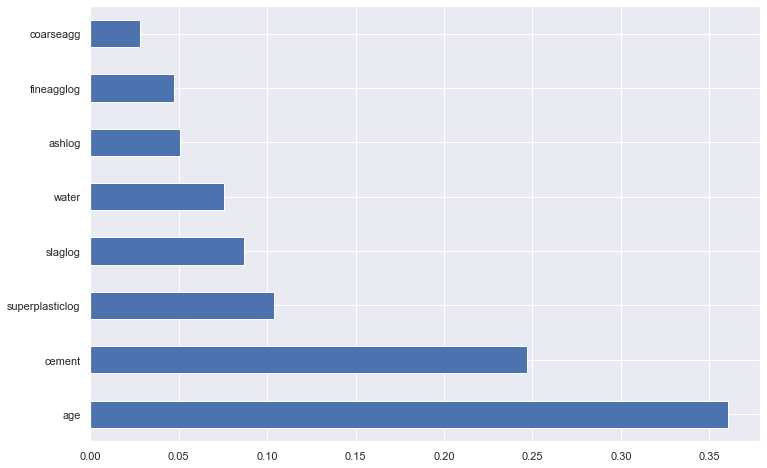

In [169]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

1) Age , Cement and Superlastic has got the higher feature importance which will have a significant impact on the model creation. 

2) All the features have got some signifance on the model and nothing can ignored at this point... Later we can ty with PCA also 

# Model

In [235]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [236]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

# Try with simple Regression

# Lasso

In [237]:
lasso = make_pipeline(PowerTransformer(), Lasso(alpha =0.0005, random_state=1))
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

#lasso = Lasso(alpha=0.0005)
#lasso.fit(X_train,y_train)
#print ("Lasso model:", (lasso.coef_))


lasso.fit(X_train, y_train)
lasso.score(X_train, y_train)




Lasso score: 7.3398 (0.4815)



0.8073340497310549

In [238]:
lasso.score(X_test, y_test)

0.762937246553825

# ENet

In [174]:
ENet = make_pipeline(PowerTransformer(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 7.3398 (0.4815)



In [175]:
ENet.fit(X_train, y_train)
ENet.score(X_train, y_train)


0.8073340459138962

In [176]:
ENet.score(X_test, y_test)

0.7629371011170436

# Linear Regression

In [249]:
LR = make_pipeline(PowerTransformer(), LinearRegression())
score = rmsle_cv(LR)
print("LR score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

LR score: 7.3398 (0.4815)



In [250]:
LR.fit(X_train, y_train)
LR.score(X_train, y_train)


0.8073340603910539

In [251]:
LR.score(X_test, y_test)

0.7629528441396676

# Kernel Ridge

In [177]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 7.6626 (0.3774)



In [178]:
KRR.fit(X_train, y_train)
KRR.score(X_train, y_train)


0.8081379715110077

In [179]:
KRR.score(X_test, y_test)

0.7627454829212659

1) All the simple regressor( Lasso, Linear regression,ENET, Ridge) were giving a normal performance on the Train and test data.. 

2) the average peformace range on the test data was coming around 76% 

3) Try the complex model and ensemble technique to achieve better performance

# Ensemble Techniques

In [68]:
# GRID SEARCH

# as the grid search is going to take more time ... try giving less values in the parms and try different options
#to get a better score...which is good approach 

#NB: Try NOT to give a range value in the parms for the GRID search as it will take huge time...


In [180]:
# parms for the Grid search

model_params = {
    'GradientBoosting': {
        'model': GradientBoostingRegressor(),
        'params' : {
            'learning_rate': [0.01, 0.02,  0.05],
            'n_estimators': [10, 20, 50 , 200],
            'max_features':  ['auto' , 'sqrt' , 'log2'] ,   
            'loss' : ['ls' , 'lad' , 'huber' ]
           }
    },
    'RandomForest': {
        'model': RandomForestRegressor(),
        'params': {
            'max_depth': [0, 2, 5, 10],
            'n_estimators': [10, 20, 200],
            'random_state': [3]
        }
   },
    'XGboost': {
        'model': xgb.XGBRegressor(),
        'params': {
           'n_estimators': [400, 700],
           'max_depth': [15,20,25],
           'reg_alpha': [1.1, 1.2, 1.3],
           'reg_lambda': [1.1, 1.2, 1.3],
        }
   }  
}

In [73]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False ,verbose = 2, n_jobs= -1)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   41.3s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  1.4min finished


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    8.7s finished


Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   40.5s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  1.1min finished


,model,best_score,best_params
0,GradientBoosting,0.909593,"{'learning_rate': 0.05, 'loss': 'ls', 'max_fea..."
1,RandomForest,0.909026,"{'max_depth': 10, 'n_estimators': 200, 'random..."
2,XGboost,0.936662,"{'max_depth': 15, 'n_estimators': 400, 'reg_al..."


# Gradient Boost

In [181]:
GBoost = GradientBoostingRegressor(n_estimators=500, learning_rate=0.05,
                                   max_depth=6, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 4.2643 (0.3678)



In [182]:
GBoost.fit(X_train, y_train)
y_gbm = GBoost.predict(X_test)
GBoost.score(X_train, y_train)

0.9836685087045584

In [183]:
GBoost.score(X_test, y_test)

0.9023262297383425

# XGBOOST Regressor

In [184]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.04, 
                             learning_rate=0.05, max_depth=15, 
                             min_child_weight=1.7817, n_estimators=500,
                             reg_alpha=1, reg_lambda=1.1,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[20:57:49] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:57:50] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:57:51] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings bu

In [185]:
model_xgb.fit(X_train, y_train)
y_xgbm = model_xgb.predict(X_test)
model_xgb.score(X_train, y_train)

[20:57:59] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




0.9973457050059752

In [186]:
model_xgb.score(X_test, y_test)

0.9007620902431305

# Light BM Regressor

In [187]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 5.1461 (0.3543)



In [188]:
model_lgb.fit(X_train, y_train)
y_lgbm = model_lgb.predict(X_test)
model_lgb.score(X_train, y_train)

0.9483609587519848

In [189]:
model_lgb.score(X_test, y_test)

0.8731011838384595

# Random Regressor

In [190]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor(max_depth=15 ,n_estimators=100 , random_state=3)
reg_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=3, verbose=0, warm_start=False)

In [191]:
y_rf = reg_rf.predict(X_test)


In [85]:
reg_rf.score(X_train, y_train)

0.9885702333866286

In [192]:
reg_rf.score(X_test, y_test)


0.8763987869611976

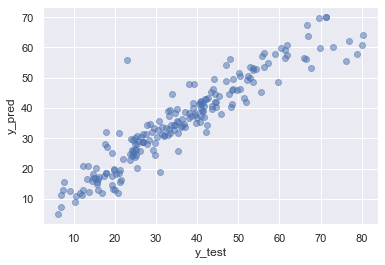

In [193]:
plt.scatter(y_test, y_rf, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [88]:
print('MAE:', metrics.mean_absolute_error(y_test, y_rf))
print('MSE:', metrics.mean_squared_error(y_test, y_rf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_rf)))

MAE: 3.8988740180702948
MSE: 34.5356671003625
RMSE: 5.876705463128342


In [194]:

metrics.r2_score(y_test, y_rf)

0.8763987869611976

1) XGBOOSt and Random forest shows a better performance in terms of the RMSE and accuracy scores.. 

2) Scale the Data and try Random forest and XGBOOST on top of tht see the results... 

3) gradient boosting was taking lot more time than other models. so we will only take the XGBOOST for now. 

# Scale the Data
#Scale the value and try feeding to Random forest regressor and XGBOOST as they were giving better scrores and RMSE values

In [195]:
from scipy.stats import zscore

Data_final_scaled  = Data_final.apply(zscore)
Data_final_scaled

,cement,water,coarseagg,age,strength,fineagglog,ashlog,slaglog,superplasticlog
0,-1.336483,1.024471,-0.038599,-0.280961,-0.340400,-0.241151,-0.914546,1.053472,-1.255495
1,-1.067872,-1.153896,1.378102,-0.501372,-0.724317,0.348356,1.117357,0.721339,0.912000
2,-0.278587,0.248549,-0.232258,-0.280961,-0.380717,1.097255,1.008375,-1.074690,0.388329
3,-0.122870,2.205223,-0.555890,-0.280961,0.619994,-1.298235,-0.914546,0.936250,-1.255495
4,-1.205097,0.532893,0.943994,-0.280961,-1.038430,-0.925417,-0.914546,1.027102,0.775383
...,...,...,...,...,...,...,...,...,...
1024,0.180776,-0.358695,0.624261,-0.674552,-0.820597,-0.177623,1.093887,-1.074690,0.809492
1025,-1.397796,-0.108087,-0.178970,-0.280961,-1.339306,0.453247,1.238194,-1.074690,0.850346
1027,-0.021655,-0.127364,-1.360420,-0.280961,0.525519,0.007980,0.984205,0.939697,0.757818
1028,0.616781,2.205223,-0.555890,3.528998,1.174206,-1.298235,-0.914546,0.696386,-1.255495


In [196]:
X= Data_final_scaled.loc[:, ['cement', 'water', 'coarseagg', 'age',  'fineagglog',
       'ashlog', 'slaglog', 'superplasticlog']]

y = Data_final_scaled.iloc[:, 4]


In [197]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [198]:
# parms for the Grid search

model_params = {
    'RandomForest': {
        'model': RandomForestRegressor(),
        'params': {
            'max_depth': [0, 2, 5, 10],
            'n_estimators': [10, 20, 200],
            'random_state': [3]
        }
   },
    'XGboost': {
        'model': xgb.XGBRegressor(),
        'params': {
           'n_estimators': [400, 700],
           'max_depth': [15,20,25],
           'reg_alpha': [1.1, 1.2, 1.3],
           'reg_lambda': [1.1, 1.2, 1.3],
        }
   }  
}

In [199]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False ,verbose = 2, n_jobs= -1)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   36.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   41.7s finished


Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   31.9s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   51.1s finished


,model,best_score,best_params
0,RandomForest,0.909285,"{'max_depth': 10, 'n_estimators': 200, 'random..."
1,XGboost,0.917656,"{'max_depth': 15, 'n_estimators': 400, 'reg_al..."


# Random Forest with Scaled Data

In [200]:
# Random Forest 

from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor(max_depth=10 ,n_estimators=200 , random_state=3)
reg_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=3, verbose=0, warm_start=False)

In [201]:
y_rf = reg_rf.predict(X_test)

In [202]:
reg_rf.score(X_train, y_train)

0.9829712915851797

In [203]:
reg_rf.score(X_test, y_test)


0.8765087240825831

# XGBOOST with Scaled Data

In [204]:
# XGBOOSt
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.04, 
                             learning_rate=0.05, max_depth=15, 
                             min_child_weight=1.7817, n_estimators=400,
                             reg_alpha=1, reg_lambda=1.1,
                             subsample=0.5213,
                             random_state =7, nthread = -1)
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.2750 (0.0219)



In [208]:
model_xgb.fit(X_train, y_train)
y_xgbm = model_xgb.predict(X_test)
model_xgb.score(X_train, y_train)

[21:19:21] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




0.9754545959232452

In [206]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

num_folds = 15
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.04, 
                             learning_rate=0.05, max_depth=15, 
                             min_child_weight=1.7817, n_estimators=400,
                             reg_alpha=1, reg_lambda=1.1,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
results = cross_val_score(model_xgb, X_train, y_train, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[21:18:51] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:18:51] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:18:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings bu

In [209]:
model_xgb.score(X_test, y_test)

0.8885138372330615

In [210]:
#XGBOOST 
pd.Series(model_xgb.feature_importances_, X_train.columns ).sort_values(ascending= False)

age                0.392833
cement             0.148011
water              0.105314
superplasticlog    0.080176
ashlog             0.079400
slaglog            0.071790
coarseagg          0.065978
fineagglog         0.056497
dtype: float32

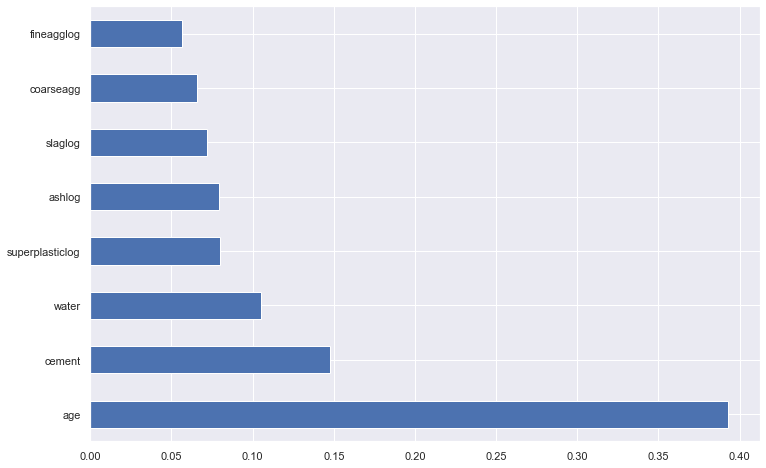

In [211]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(model_xgb.feature_importances_, X_train.columns )
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

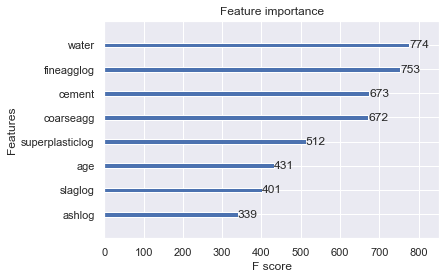

In [109]:
# another way to display the feature importance

from xgboost import plot_importance
import matplotlib.pyplot as plt
from matplotlib import pyplot

# plot feature importance
plot_importance(model_xgb)
pyplot.show()

1) Looks like the XGBOOST is showing better results than the Random forest model.

2) XGBOOSt was giving better performance in both the Data with and without scaling.. 

3) XGBOOST is coming around 88% on the test Data which is very good. 

1) Feature importance  values out of the Extra regressor and XGBOOST shows almost all the features are important and add signifance to the model 

2) The Lasso coef also did not had any zero values in its results.. 

3) As the Regression scores are high we will try the dimension reduction using PCA and try

# PCA

In [212]:
# PCA
# Step 1 - Create covariance matrix



Data_Scaled =  Data_final_scaled.copy(deep=True) 
Data_final_PCA = Data_Scaled.drop('strength', axis = 1)

cov_matrix = np.cov(Data_final_PCA.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00098814 -0.03181356 -0.07385755  0.08748631 -0.28414571 -0.35075568
  -0.18467764 -0.08018484]
 [-0.03181356  1.00098814 -0.24518879  0.28450056 -0.42909574 -0.30444218
   0.022003   -0.5957069 ]
 [-0.07385755 -0.24518879  1.00098814 -0.00668258 -0.13956367 -0.03425795
  -0.36740324 -0.20685307]
 [ 0.08748631  0.28450056 -0.00668258  1.00098814 -0.17271904 -0.16804008
  -0.02953187 -0.23870084]
 [-0.28414571 -0.42909574 -0.13956367 -0.17271904  1.00098814  0.14931575
  -0.24846156  0.16974729]
 [-0.35075568 -0.30444218 -0.03425795 -0.16804008  0.14931575  1.00098814
  -0.16363174  0.62964705]
 [-0.18467764  0.022003   -0.36740324 -0.02953187 -0.24846156 -0.16363174
   1.00098814  0.16025619]
 [-0.08018484 -0.5957069  -0.20685307 -0.23870084  0.16974729  0.62964705
   0.16025619  1.00098814]]


In [213]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 0.22288392 -0.35089185  0.24323675 -0.12829951  0.11024838 -0.80966462
   0.24006442 -0.16195789]
 [ 0.48578112 -0.53358106 -0.26532077  0.20385657  0.45966599  0.35299278
   0.1668587   0.06013965]
 [ 0.01946378 -0.43664709 -0.06100746 -0.63120483 -0.23762368  0.04139236
  -0.37589486  0.45535013]
 [ 0.30094619  0.01304701  0.00790258  0.00132563 -0.6664091   0.14485117
   0.64359729  0.17290617]
 [-0.35080534 -0.4528662   0.06253011 -0.17537495 -0.20175917  0.28775223
   0.09015614 -0.71101701]
 [-0.47334318 -0.16899648  0.56402235  0.02920548  0.29380145  0.17409578
   0.37060151  0.41765792]
 [ 0.02419969 -0.35002394  0.29464061  0.67632784 -0.38022016 -0.05636675
  -0.41770068  0.1022093 ]
 [-0.52506022 -0.21253443 -0.67661812  0.23352038 -0.06627926 -0.28435227
   0.19764961  0.20611284]]

 Eigen Values 
%s [2.40430635 0.08900819 0.17001712 1.49818065 0.76909582 1.1383695
 0.93618746 1.00274004]


In [214]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 30.02416125  48.73293246  62.94850424  75.47038137  87.16117247
  96.76537991  98.88849594 100.        ]


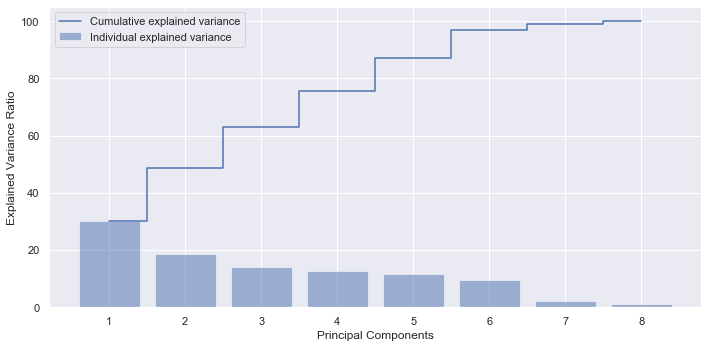

In [215]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [216]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot

# choose 7 components to have a 95 % variance from the graph above.

from sklearn.decomposition import PCA

# NOTE - we are generating only 6 PCA dimensions (dimensionality reduction from 8 to 6)

pca = PCA(n_components=6)
data_reduced = pca.fit_transform(Data_final_PCA)
data_reduced.transpose()

array([[ 1.31667825, -2.03511197, -1.12256032, ..., -1.02155656,
         3.82433004,  2.02360556],
       [ 0.83919787, -0.29637858, -0.56649992, ...,  1.67499949,
         1.104745  , -2.3207661 ],
       [-1.47045006, -0.43649877, -0.70443203, ...,  0.21924662,
        -0.55217321,  2.58388176],
       [ 0.14969491, -1.12507261,  0.48308646, ...,  0.01457132,
        -0.74329313, -1.12015401],
       [-1.36507402, -0.96514566,  0.879354  , ...,  0.42683649,
         2.00123271, -0.92292821],
       [ 0.01740223,  0.71820606, -0.78372197, ..., -0.32960187,
         1.32632955, -0.67547057]])

In [217]:
df_comp = pd.DataFrame(pca.components_,columns=list(Data_final_PCA))
df_comp



,cement,water,coarseagg,age,fineagglog,ashlog,slaglog,superplasticlog
0,0.222884,0.485781,0.019464,0.300946,-0.350805,-0.473343,0.024200,-0.525060
1,-0.128300,0.203857,-0.631205,0.001326,-0.175375,0.029205,0.676328,0.233520
2,0.809665,-0.352993,-0.041392,-0.144851,-0.287752,-0.174096,0.056367,0.284352
3,0.161958,-0.060140,-0.455350,-0.172906,0.711017,-0.417658,-0.102209,-0.206113
4,0.240064,0.166859,-0.375895,0.643597,0.090156,0.370602,-0.417701,0.197650
5,-0.110248,-0.459666,0.237624,0.666409,0.201759,-0.293801,0.380220,0.066279


# XGBOOST with PCA ( reduced to 6 features) 

In [218]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_reduced, y, test_size = 0.2, random_state = 42)

In [219]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

num_folds = 15
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.04, 
                             learning_rate=0.05, max_depth=15, 
                             min_child_weight=1.7817, n_estimators=400,
                             reg_alpha=1, reg_lambda=1.1,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
results = cross_val_score(model_xgb, X_train, y_train, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[21:26:16] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:26:16] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:26:17] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings bu

In [220]:
model_xgb.fit(X_train, y_train)
y_xgbm = model_xgb.predict(X_test)
model_xgb.score(X_train, y_train)

[21:26:38] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




0.9661021909872884

In [221]:
model_xgb.score(X_test, y_test)

0.7130309478750514

1)From the Cross validation score  the Accuracy is coming around 71.3% ( around a Standard deviaion 6.5%)which is very low compared to other options... ( with PCA reduced components). So we will not go with the Reduced component model. 

2) The accuracy score will come in range 90 and 99% on the training Data with a variation of 2 standard deviation which ocmes around around 95% confidence interval as per the cross validation results. ( with Scaled Data)

3) The test data accuracy score is also 88% with scaled data. With the confident range of 95% the average score will range between 82% and 94% with 2 standard deviation as per the Validation score( with Scaled Data). 

4) So we will go with the XGBOOST model with the SCALED data using all the features....as it gives a consistent score. 

5) All the features in the problem is important as each gives a significant importance on the final model. 


